In [16]:
import os

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Get the allen data
data_Dir = os.getcwd().replace('02_Analyse_Single_Neuron_metrics','01_Explore_Allen_Brain_Observatory') + '/01_Data'

# Create a directory for data, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(data_Dir, exist_ok=True)

# Get the current working directory and create a path for a new directory named "02_Analysis".
analysis_Dir = os.getcwd() + '/02_Analysis'

# Create a directory for analysis, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(analysis_Dir, exist_ok=True)

# Create a path for a new directory named "Tutorial_01_outputs".
output_Dir = analysis_Dir + '/01_Firing_properties'

# Create a directory for outputs, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(output_Dir, exist_ok=True)

In [18]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join(data_Dir+'/', 'manifest.json')

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path, timeout=50*60)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


# Filter sessions

In [19]:
# load session information
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
display(brain_observatory_type_sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [20]:
# download dataset of a specific session
session_id = 791319847
session_dir = data_Dir+'/session_'+str(session_id)
session = cache.get_session_data(session_id) 
sessions.loc[session_id]

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           769360779
session_type                                              brain_observatory_1.1
age_in_days                                                               116.0
sex                                                                           M
full_genotype                     Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
unit_count                                                                  555
channel_count                                                              2229
probe_count                                                                   6
ecephys_structure_acronyms    [APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,...
Name: 791319847, dtype: object

In [21]:
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

# Get spike times

In [22]:
# Set the region of interest
region = "VISp"

# Filter units for the specified region
units = session.units[session.units["ecephys_structure_acronym"] == region]

# Extract spike timings for each unit, filtered to 0-600 seconds
# Define the recording duration (in seconds)
recording_duration = 600  # 0–600 seconds
spike_times = []
for unit_id in units.index:
    # Filter spike times to only include those between 0 and 600 seconds
    filtered_spike_times = session.spike_times[unit_id]
    filtered_spike_times = filtered_spike_times[filtered_spike_times <= recording_duration]
    spike_times.append(filtered_spike_times)

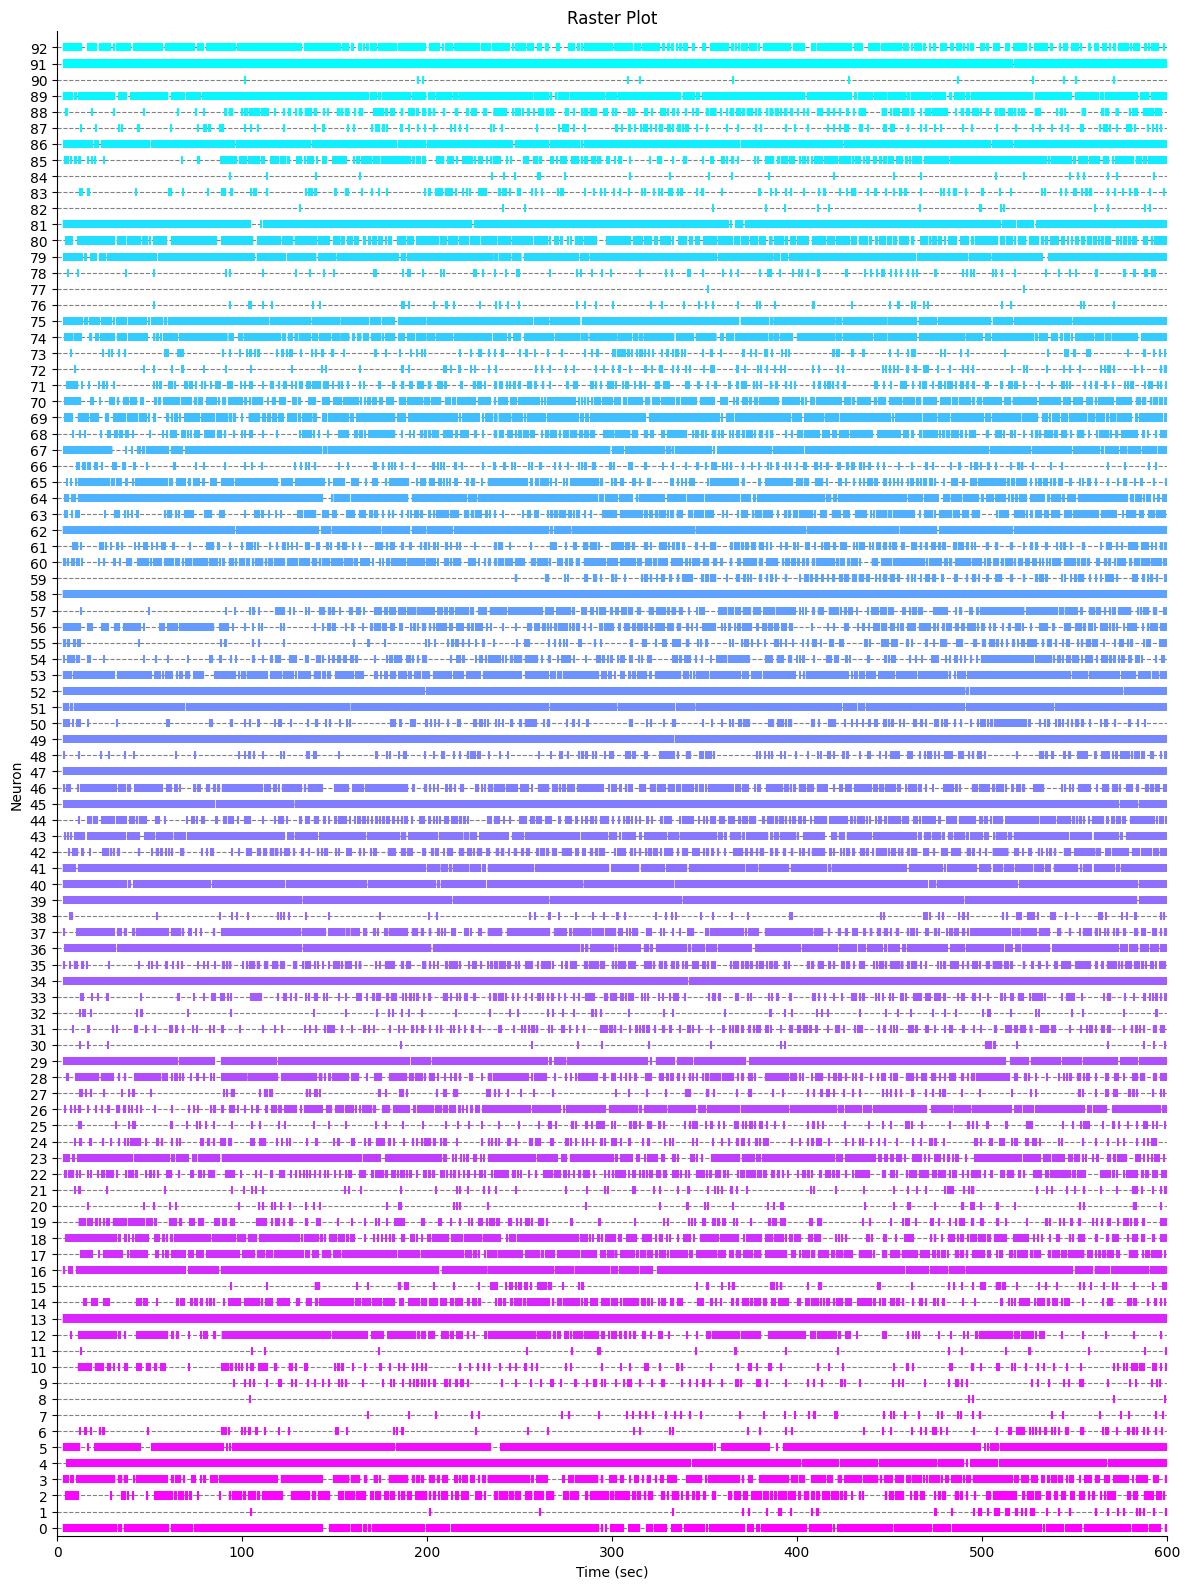

In [23]:
# plot
num_plot_neurons = len(units.index)
color_idx = np.linspace(1, 0, num_plot_neurons)

# Create a raster plot
plt.figure(figsize=(12, 16), tight_layout=True)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set axis labels and spines
plt.xlim(0,600)
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
sns.despine()

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')
# Save
plt.savefig(output_Dir+'/Spike-train.png')

# Firing Rate Calculation

#### The firing rate is calculated as the total number of spikes divided by the recording duration. 

In [32]:
# Initialize an empty list to store firing rates for all units in the current region
firing_rates = []

# Calculate the firing rate for each unit in the region
# Firing rate is computed as the total number of spikes divided by the recording duration (in seconds).
for unit_id in range(len(spike_times)):
    firing_rates.append(len(spike_times[unit_id]) / recording_duration)

# Convert the list of firing rates to a NumPy array for efficient numerical operations
firing_rates = np.array(firing_rates)

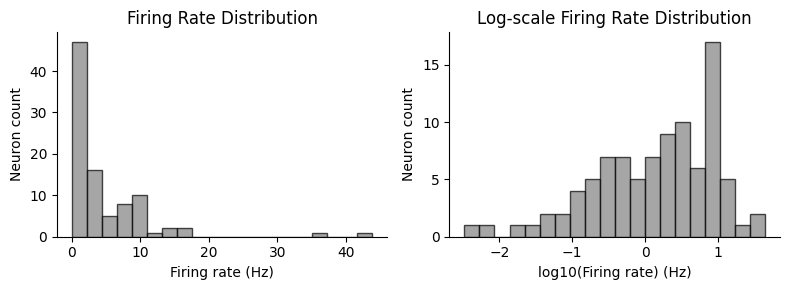

In [25]:
# Plot the distribution of firing rates
plt.figure(figsize=(8, 3), tight_layout=True)
plt.subplot(121)
plt.hist(firing_rates, bins=20, color='gray', alpha=0.7, edgecolor='black')
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Neuron count")
plt.title("Firing Rate Distribution")
sns.despine()
# Optionally, plot the log-scale distribution
plt.subplot(122)
plt.hist(np.log10(firing_rates), bins=20, color='gray', alpha=0.7, edgecolor='black')
plt.xlabel("log10(Firing rate) (Hz)")
plt.ylabel("Neuron count")
plt.title("Log-scale Firing Rate Distribution")
sns.despine()
plt.savefig(output_Dir+'/Firing_rate_distribution.png')

# Practice
#### Let's calculate the firing rates of neurons for each brain region and comparing their distributions!

In [30]:
# Define the recording duration (in seconds)
recording_duration = 600

# Step 1: Extract spike times for all regions
# -------------------------------------------
# Data Structuring: 
# By organizing the data (e.g., spike times) with keys corresponding to brain regions, 
# the relationship between regions and their data becomes more intuitive.
# For example, by accessing spike_times_all["VISp"], you can easily retrieve 
# the list of spike times for the VISp region without additional filtering.

spike_times_all = {}
for region in session.structurewise_unit_counts.keys():
    units = session.units[session.units["ecephys_structure_acronym"] == region]

    # Filter spike times for each unit (0-600 seconds)
    spike_times = []
    for unit_id in units.index:
        # Only include spike times between 0 and 600 seconds
        filtered_spike_times = session.spike_times[unit_id]
        filtered_spike_times = filtered_spike_times[filtered_spike_times <= recording_duration]
        spike_times.append(filtered_spike_times)

    # Add spike times for this region to the dictionary
    spike_times_all.update({region: spike_times})

# Step 2: Calculate firing rates for all regions
# ----------------------------------------------
# Calculate the firing rate for each unit in each region, using the formula:
# Firing rate = Total spikes / Recording duration (Hz)
# The result is stored in firing_rates_all, a dictionary similar to spike_times_all.

firing_rates_all = {}
for region in session.structurewise_unit_counts.keys():
    spike_times = spike_times_all[region]
    firing_rates = []

    # Calculate the firing rate for each unit
    for unit_id in range(len(spike_times)):
        firing_rate = len(spike_times[unit_id]) / recording_duration
        firing_rates.append(firing_rate)

    # Add firing rates for this region to the dictionary
    firing_rates_all.update({region: firing_rates})


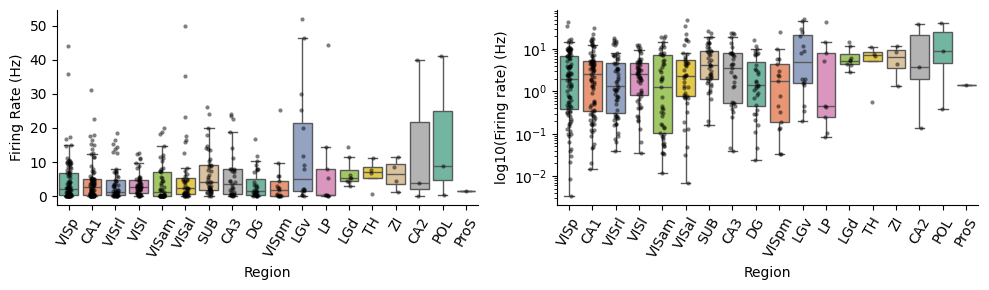

In [31]:
# Convert to DataFrame
data = []
for region, rates in firing_rates_all.items():
    for rate in rates:
        data.append({"Region": region, "Firing Rate": rate})
df = pd.DataFrame(data)

# Plot the distribution of firing rates
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(121)
sns.boxplot(x="Region", y="Firing Rate", data=df, palette="Set2", showfliers=False)
sns.stripplot(x="Region", y="Firing Rate", data=df, color="black", size=3, alpha=0.5, jitter=True)
plt.xticks(rotation=60)
plt.xlabel("Region")
plt.ylabel("Firing Rate (Hz)")
sns.despine()
# Optionally, plot the log-scale distribution
plt.subplot(122)
sns.boxplot(x="Region", y="Firing Rate", data=df, palette="Set2", showfliers=False)
sns.stripplot(x="Region", y="Firing Rate", data=df, color="black", size=3, alpha=0.5, jitter=True)
plt.xticks(rotation=60)
plt.yscale('log')
plt.xlabel("Region")
plt.ylabel("Firing Rate (Hz)")
plt.ylabel("log10(Firing rate) (Hz)")
sns.despine()
plt.savefig(output_Dir+'/Firing_rate_comparison.png')

# Classification of Regular spiking and Fast spiking neurons

In [88]:
def calculate_waveform_duration(waveform, timestamps):
    
    """ 
    Duration (in seconds) between peak and trough
    From: https://github.com/AllenInstitute/ecephys_spike_sorting/blob/7e567a6fc3fd2fc0eedef750b83b8b8a0d469544/ecephys_spike_sorting/modules/mean_waveforms/waveform_metrics.py#L126-L151

    Inputs:
    ------
    waveform : numpy.ndarray (N samples)
    timestamps : numpy.ndarray (N samples)

    Outputs:
    --------
    duration : waveform duration in milliseconds

    """

    trough_idx = np.argmin(waveform)
    peak_idx = np.argmax(waveform)

    # to avoid detecting peak before trough
    if waveform[peak_idx] > np.abs(waveform[trough_idx]):
        duration =  timestamps[peak_idx:][np.where(waveform[peak_idx:]==np.min(waveform[peak_idx:]))[0][0]] - timestamps[peak_idx] 
    else:
        duration =  timestamps[trough_idx:][np.where(waveform[trough_idx:]==np.max(waveform[trough_idx:]))[0][0]] - timestamps[trough_idx] 

    return duration * 1e3

In [103]:
# Extract unit waveforms and calculate waveform durations for all units in the specified region

# Specify the brain region of interest
region = 'VISp'

# Filter units for the specified region
units = session.units[session.units["ecephys_structure_acronym"] == region]

# Initialize dictionaries to store firing rates, waveforms, and waveform durations for each unit
firing_rates = {}         # Firing rates for each unit
waveforms = {}            # Waveforms for each unit
waveform_durations = {}   # Waveform durations (peak-to-trough) for each unit

# Iterate over all unit_ids in the region
for unit_id in units.index:
    # Get the firing rate of the current unit
    # The firing rate is a predefined metric in the units table
    firing_rates[unit_id] = units.loc[unit_id].firing_rate
    
    # Get the peak channel for the current unit
    # The peak channel corresponds to the electrode channel with the largest spike amplitude
    peak_channel = session.units.loc[unit_id].peak_channel_id
    
    # Extract the mean waveform for the current unit at the peak channel
    # This gives the average spike waveform over all spikes recorded for this unit
    wv = session.mean_waveforms[unit_id].loc[{"channel_id": peak_channel}]
    
    # Calculate the duration of the waveform (peak-to-trough in milliseconds)
    # The calculate_waveform_duration function computes the time difference between the peak and trough of the waveform
    waveform_duration = calculate_waveform_duration(wv.values, wv['time'].values)
    
    # Store the waveform and its duration in the corresponding dictionaries
    waveforms[unit_id] = wv
    waveform_durations[unit_id] = waveform_duration


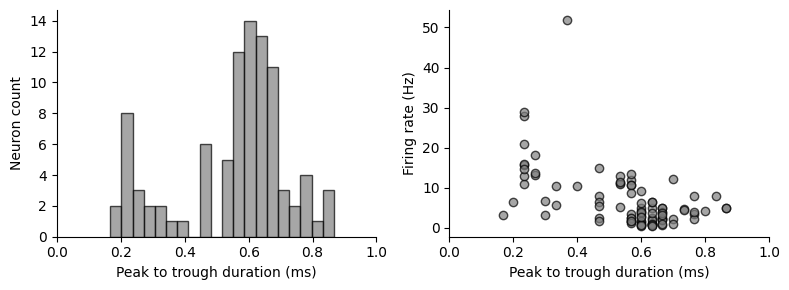

In [134]:
# Plot the distribution of peak to trough durations
plt.figure(figsize=(8, 3), tight_layout=True)
plt.subplot(121)
plt.hist(list(waveform_durations.values()), bins=20, color='gray', alpha=0.7, edgecolor='black')
plt.xlabel("Peak to trough duration (ms)")
plt.ylabel("Neuron count")
plt.xlim(0,1)
sns.despine()
# Plot the relationship between the peak to trough duration and firing rate
plt.subplot(122)
plt.scatter(list(waveform_durations.values()),list(firing_rates.values()), color='gray', alpha=0.7, edgecolor='black')
plt.xlabel("Peak to trough duration (ms)")
plt.ylabel("Firing rate (Hz)")
plt.xlim(0,1)
sns.despine()
plt.savefig(output_Dir+'/Peak_to_trough_duration.png')

In [122]:
# Setting threshold for classification (0.4 ms)
threshold = 0.4

# Setting label and color
labels = ['RS' if duration > threshold else 'FS' for duration in waveform_durations.values()]
colors = ['mediumpurple' if label == 'RS' else 'orange' for label in labels]

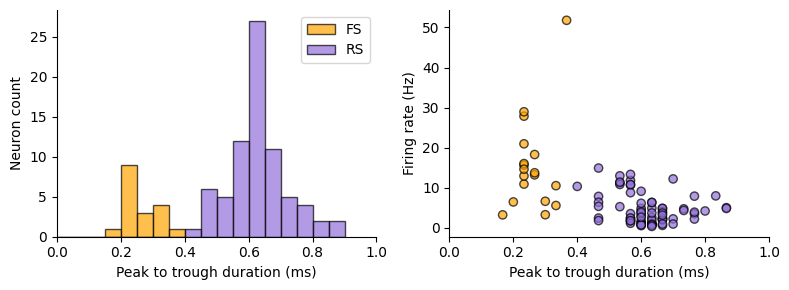

In [135]:
# Define bin settings for the histogram
bin_width = 0.05  # Bin width for the histogram (e.g., 0.05 ms)
min_duration = 0.0  # Minimum value for waveform durations (customizable)
max_duration = max(waveform_durations.values())  # Maximum value for waveform durations
bins = np.arange(min_duration, max_duration + bin_width, bin_width)  # Generate evenly spaced bins

# Create the figure for the histogram and scatter plot
plt.figure(figsize=(8, 3), tight_layout=True)

# Plot the histogram of waveform durations
plt.subplot(121)
# Plot the histogram for FS neurons (in orange)
plt.hist([d for d, label in zip(waveform_durations.values(), labels) if label == 'FS'], 
         bins=bins, color='orange', alpha=0.7, edgecolor='black', label='FS')
# Plot the histogram for RS neurons (in mediumpurple)
plt.hist([d for d, label in zip(waveform_durations.values(), labels) if label == 'RS'], 
         bins=bins, color='mediumpurple', alpha=0.7, edgecolor='black', label='RS')
plt.xlim(0, 1)  # Set the x-axis limits to ensure both RS and FS are clearly visible
plt.xlabel("Peak to trough duration (ms)")  # Label for the x-axis
plt.ylabel("Neuron count")  # Label for the y-axis
plt.legend()  # Add a legend to distinguish RS and FS
sns.despine()  # Remove the top and right spines for a cleaner look

# Plot the scatter plot of waveform durations vs. firing rates
plt.subplot(122)
# Scatter plot with colors based on RS (mediumpurple) and FS (orange)
plt.scatter(list(waveform_durations.values()), list(firing_rates.values()), 
            c=colors, alpha=0.7, edgecolor='black')
plt.xlim(0, 1)  # Set the x-axis limits to match the histogram
plt.xlabel("Peak to trough duration (ms)")  # Label for the x-axis
plt.ylabel("Firing rate (Hz)")  # Label for the y-axis
sns.despine()  # Remove the top and right spines
plt.savefig(output_Dir+'/unit_classification.png')